# Assignment 1: Exploratory Data Analysis of the Titanic: Machine Learning From Disaster dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q1

In [2]:
#load train dataset
train = pd.read_csv("train.csv")
#the first five passengers
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q2

In [3]:
#In result: 
#(number of rows, number of columns)
train.shape

(891, 12)

There are 891 rows (entries) and 12 columns (attributes).

### Q3

In [4]:
#In result:
#column name   number of non-null rows
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

There aren't NaN (null) values in columns that PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Fare. In Age column has 714 non-null values/rows, thus there are 177 NaN values. Same way, there are 204 non-null value, 687 NaN values in Cabin column and 889 non-null value, 2 NaN values. 

And we can get answer of Q2 and Q3 in this way:

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Q4

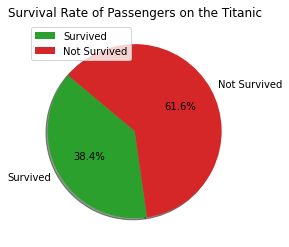

In [6]:
#survived percentage / did not survived percentage
labels = ["Survived", "Not Survived"]
survived_data = []

i = 1
while i >= 0 :
    condition = train[train.Survived == i]
    survived_data.append(condition["PassengerId"].count())
    i -= 1

colors = ["#2ca02c", "#d62728"]
plt.pie(survived_data, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Survival Rate of Passengers on the Titanic")
plt.legend(labels, loc=2)
plt.show()

Not Survived the percentage of the passengers  who did not survive is higher. The reason may be that there were not enough emergency boats and the water was too cold.

### Q5

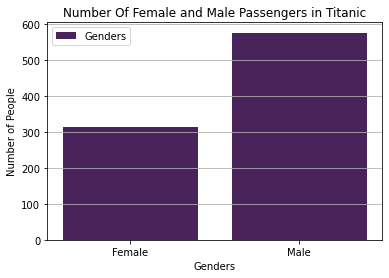

In [7]:
count_genders = []
condition_female = train[train.Sex == "female"]
count_genders.append(condition_female["Sex"].count())

condition_male = train[train.Sex == "male"]
count_genders.append(condition_male["Sex"].count())

plt.title("Number Of Female and Male Passengers in Titanic")
genders = ["Female", "Male"]
plt.bar(genders, count_genders, color = "#4A235A")
plt.legend(["Genders"], loc=2)
plt.xlabel("Genders")
plt.ylabel("Number of People")
plt.grid(axis="y")
plt.show()

### Q6

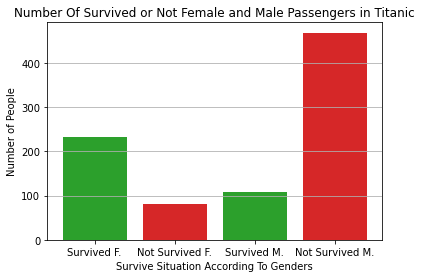

In [8]:
values = []
i = 1
while i>=0:
    cond = train[(train.Sex == "female") & (train.Survived == i)]
    values.append(cond["PassengerId"].count())
    i -= 1
    
i = 1    
while i>=0:
    cond = train[(train.Sex == "male") & (train.Survived == i)]
    values.append(cond["PassengerId"].count())
    i -= 1

colors = ["#2ca02c", "#d62728", "#2ca02c", "#d62728"] 
plt.title("Number Of Survived or Not Female and Male Passengers in Titanic")
xaxis = ["Survived F.", "Not Survived F.", "Survived M.", "Not Survived M."]
plt.bar(xaxis,values, color = colors)
plt.xlabel("Survive Situation According To Genders")
plt.ylabel("Number of People")
plt.grid(axis="y")
plt.show()

### Q7

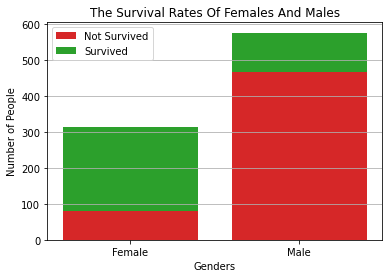

In [9]:
cases = ["Not Survived", "Survived"]
survived = [values[0], values[2]]
not_survived = [values[1], values[3]]

plt.title("The Survival Rates Of Females And Males")
plt.bar(genders, not_survived, color='#d62728')
plt.bar(genders, survived,bottom=not_survived, color='#2ca02c')
plt.legend(cases)
plt.xlabel("Genders")
plt.ylabel("Number of People")
plt.grid(axis="y")
plt.show()

There are more male passengers. The reason for this could be the role of women in social life is not active in the period of 1912.
The rate of survived female is more than male. The reason of this could be rescue of the first women and children in case of an emergency.

### Q8

In [10]:
pd.crosstab(train["Pclass"] ,train["Survived"], margins = "True")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


The first class has most number of survivors and second class has the lowest number of survivors.
The rate of 1st class = 136/216 = 0.63, 
the rate of 2nd class = 87/184 = 0.47, 
the rate of 3rd class = 119/491 = 0.24. 
The first class has most rate of survivors and third class has the lowest rate of survivors.

### Q9

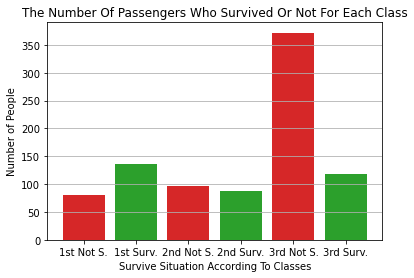

In [11]:
values = []
for i in range(1,4):
    for j in range(2):
        cond = train[(train.Pclass == i) & (train.Survived == j)]
        values.append(cond["PassengerId"].count())

colors = ["#d62728", "#2ca02c"]
situations = ["1st Not S.", "1st Surv.", "2nd Not S.", "2nd Surv.", "3rd Not S.", "3rd Surv."]
plt.title("The Number Of Passengers Who Survived Or Not For Each Class")
plt.bar(situations, values, color = colors)
plt.xlabel("Survive Situation According To Classes")
plt.ylabel("Number of People")
plt.grid(axis="y")
plt.show()

### Q10

In [12]:
pd.crosstab([train["Sex"], train["Survived"]], train["Pclass"], margins = "True")

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

The rate of survived female = 233/(81+233) = 0.74, 
the rate of survived male = 109/(468+109) = 0.19. 
According to this calculate, the rate of survived female is more. The reason of this could be rescue of the first women and children in case of an emergency as I say in Q7.

### Q11

In [13]:
train["Age"].max()

80.0

### Q12

In [14]:
train["Age"].min()

0.42

### Q13

In [15]:
train["Age"].mean()

29.69911764705882

### Q14

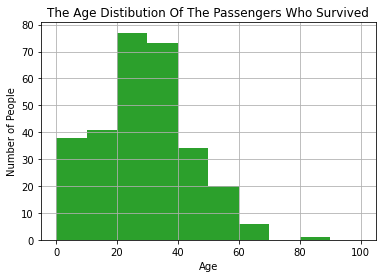

In [24]:
plt.title("The Age Distibution Of The Passengers Who Survived")
surv = train[train.Survived == 1]
plt.hist(surv["Age"], bins=10, range=(0,100), color="#2ca02c")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.grid()
plt.show()

### Q15

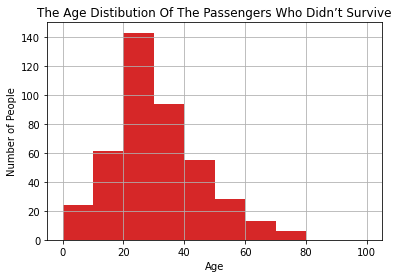

In [17]:
plt.title("The Age Distibution Of The Passengers Who Didn’t Survive")
not_surv = train[train.Survived == 0]
plt.hist(not_surv["Age"], bins = 10, range=(0,100), color="#d62728")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.grid()
plt.show()

The number of survived childeren is more. The number of survived average people seem lower. Also, at least 1 passenger aged 80 seems to be survived interestingly.

### Q16

In [18]:
train["Fare"].min()

0.0

### Q17

In [19]:
train["Fare"].max()

512.3292

### Q18

In [20]:
train["Fare"].mean()

32.2042079685746

### Q19

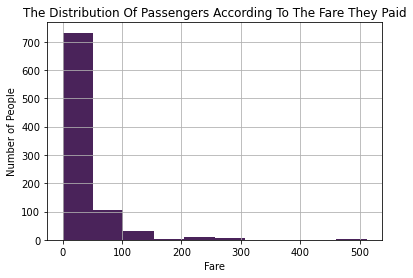

In [21]:
plt.title("The Distribution Of Passengers According To The Fare They Paid")
plt.hist(train["Fare"], bins=10, color="#4A235A")
plt.xlabel("Fare")
plt.ylabel("Number of People")
plt.grid()
plt.show()

### Q20

In [22]:
train[(train.Age<10) & (train.Parch == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S


There was a girl who 5 years old, without their parents in Titanic. A child being in Titanic without family is an unusual situation. I think it's an event that will probably change the child's life. She may be sent to an orphanage or a relative whose family has died. On the other hand, he may be going elsewhere for training.